**Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.**

In [1]:
#loading required libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
#loading the dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(bos, columns=boston.feature_names)

In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [8]:
plt.style.use('dark_background')

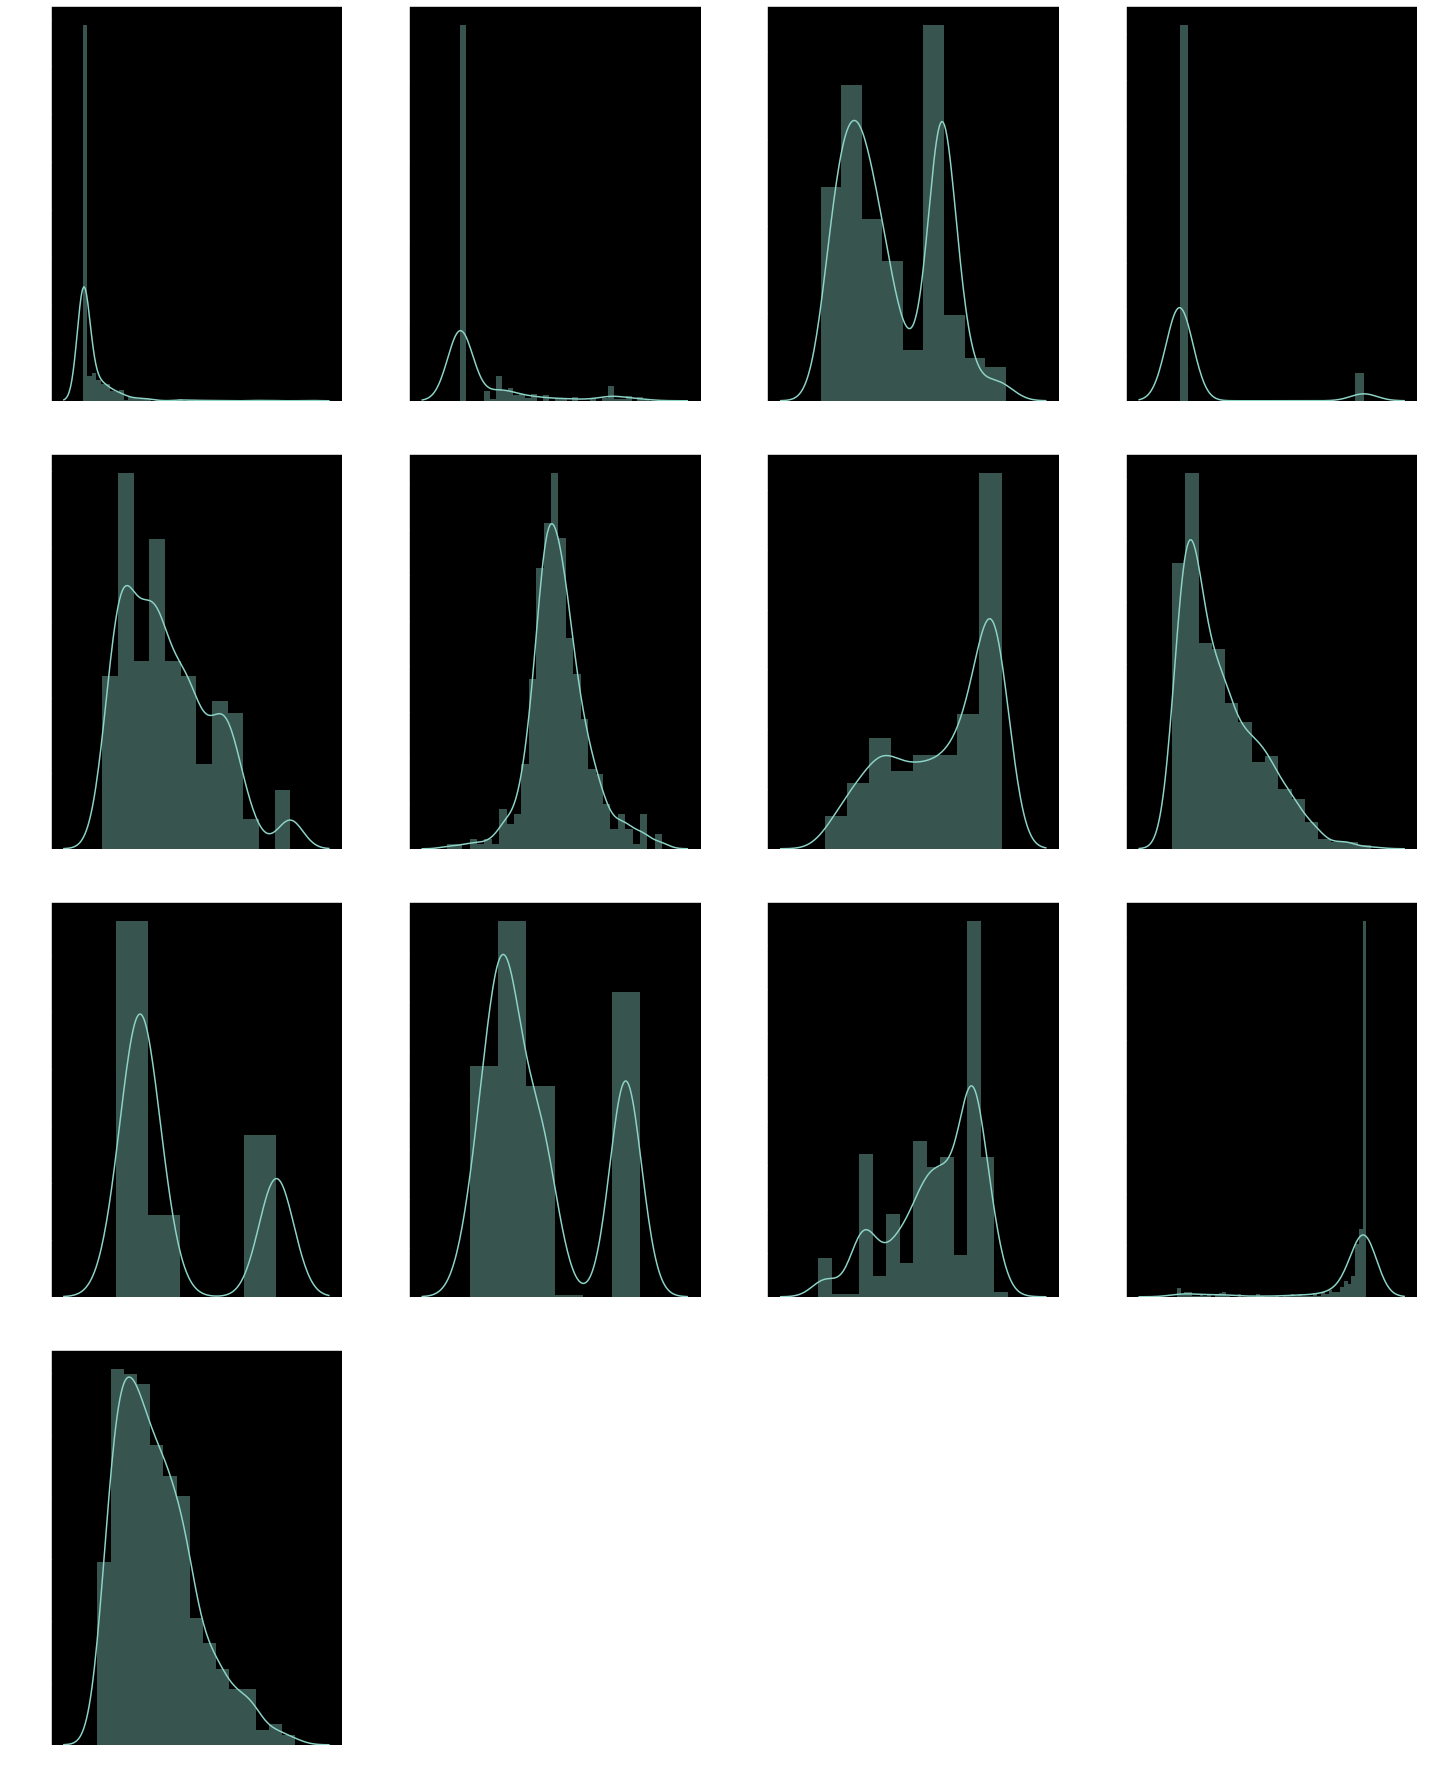

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

there were some outliers, let us see the correlation first using heatmap then drop the highly correlated varibles then act treat the outliers

<AxesSubplot:ylabel='Density'>

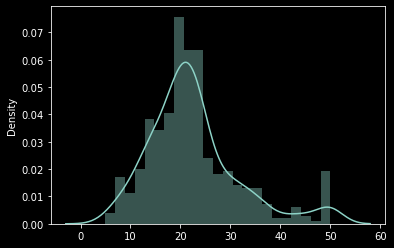

In [15]:
boston = load_boston()
sns.distplot(boston.target) #price is distributed normally with few outliers

In [16]:
bos['PRICE'] = boston.target
cor=bos.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

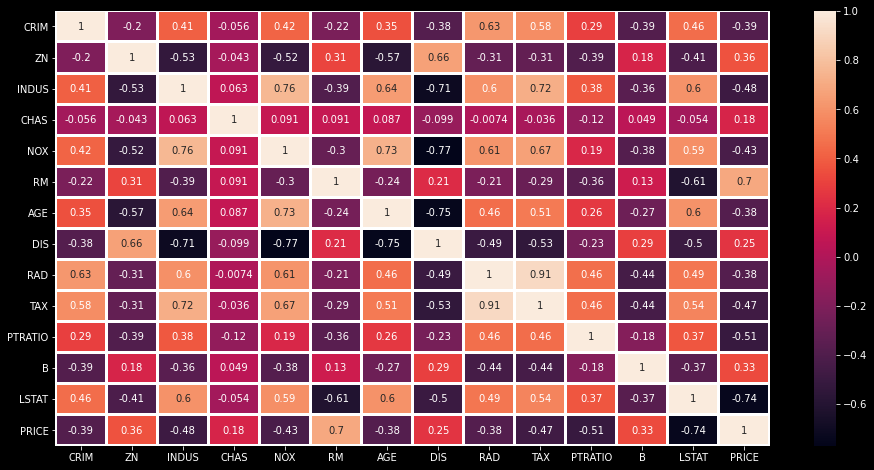

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(cor, annot=True, linewidths=2)

since DIS has high correlation between the some varibles we can drop this 

In [18]:

bos.drop('TAX', axis=1, inplace=True)#dropping the TAX as TAX and RAD are highly correlated

In [19]:
y = bos['PRICE']
X =bos.drop(columns = ['PRICE'])

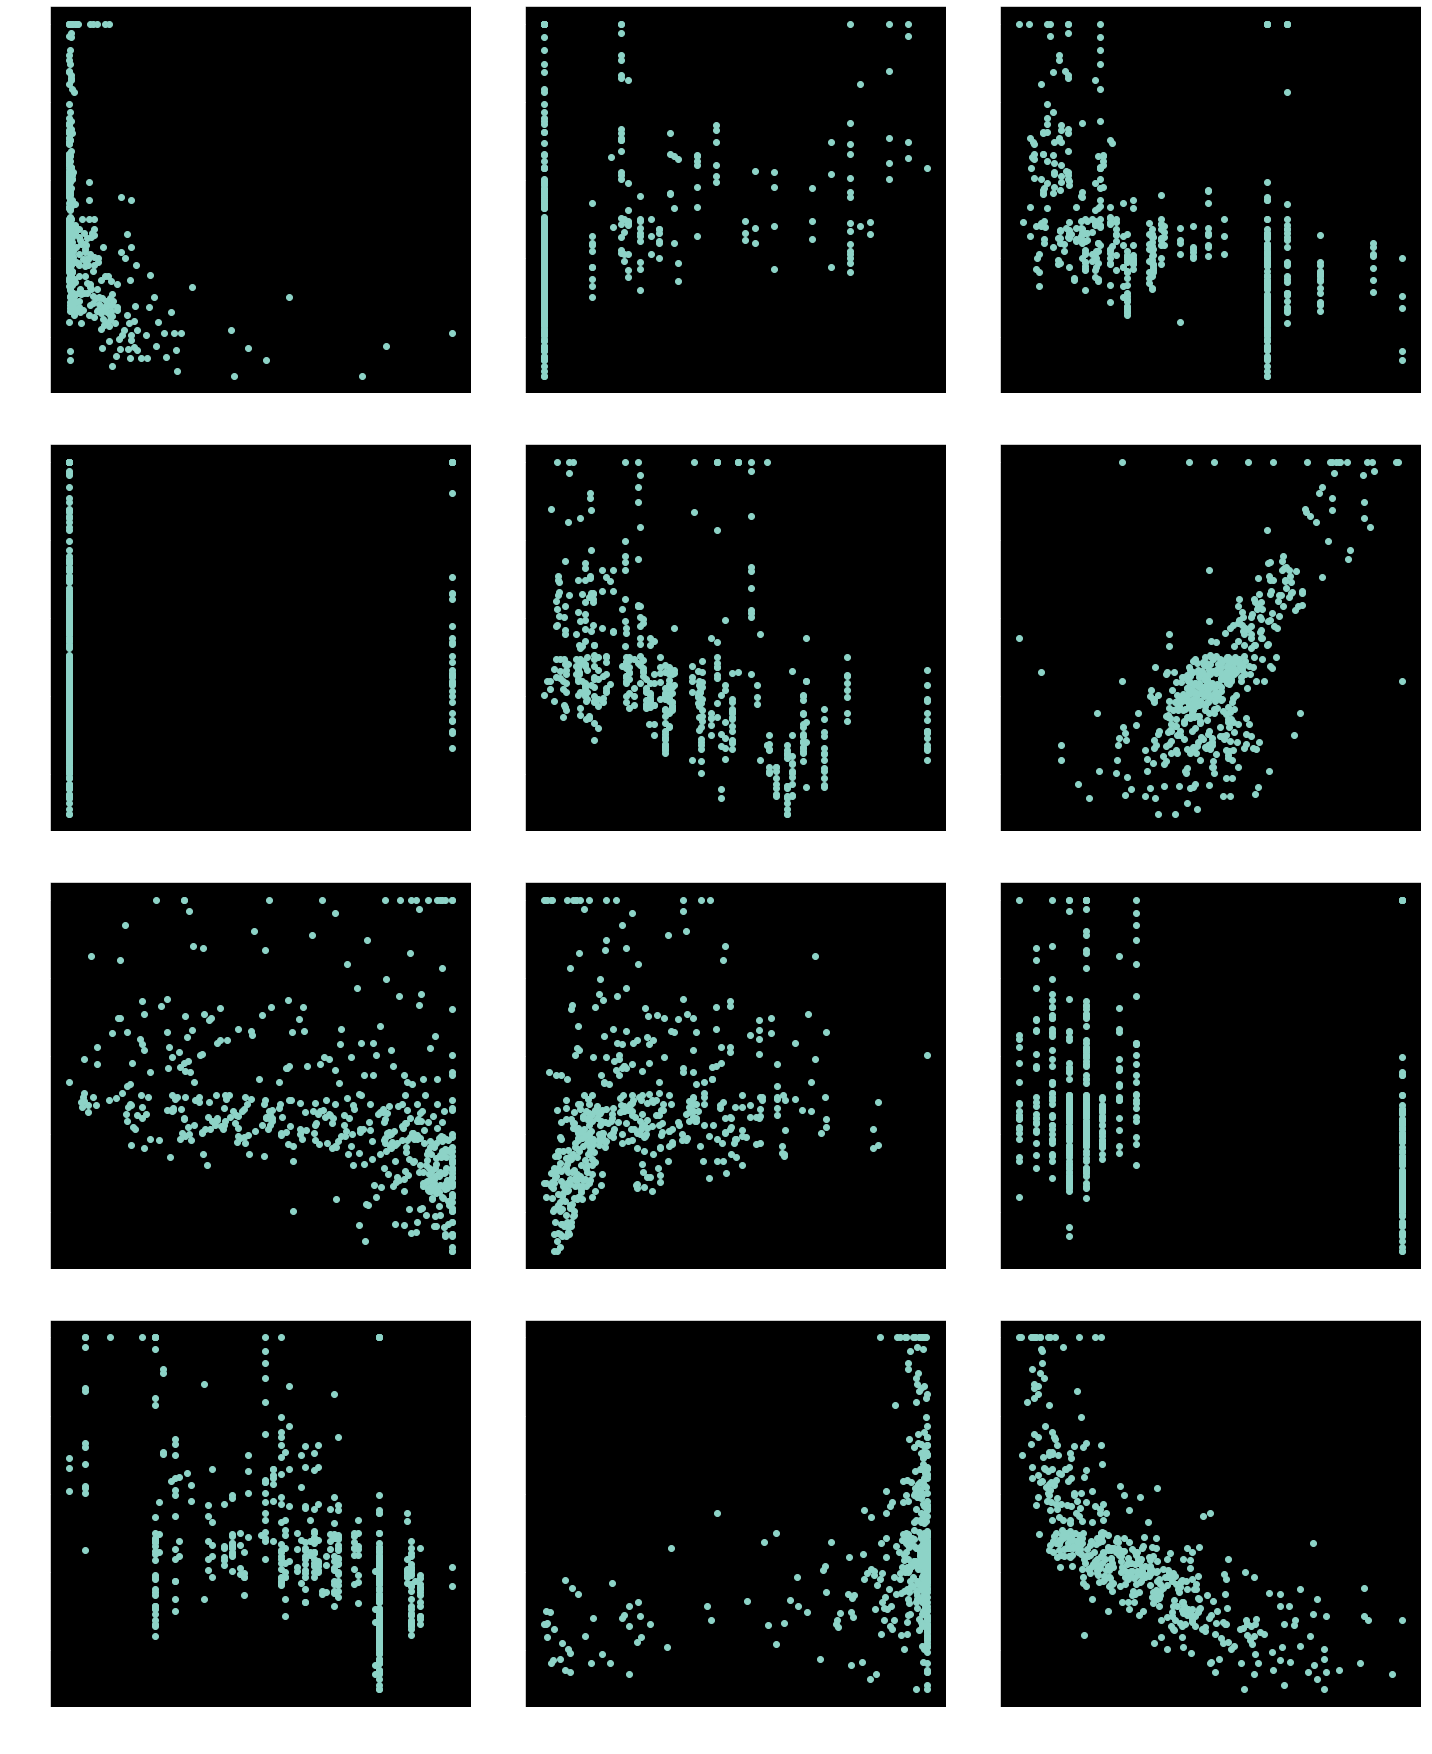

In [20]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()

some of the varibles were not correlated with price

In [21]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

In [22]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [23]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =X_scaled 
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [25]:
vif#good to go

,VIF,Features
0,1.791940,CRIM
1,2.184240,ZN
2,3.226015,INDUS
3,1.058220,CHAS
4,4.369271,NOX
5,1.923075,RM
6,3.098044,AGE
7,3.954446,DIS
8,2.837494,RAD
9,1.788839,PTRATIO


In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [27]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [28]:
regression.score(x_train,y_train)#training R2

0.7263352878677987

In [29]:
adj_r2(x_train,y_train)

0.7173626743552675

In [30]:
regression.score(x_test,y_test)#tesing R2

0.7431889797578299

In [31]:
adj_r2(x_test,y_test)

0.71615624078497

Model is working pretty well as there is no much difference between training and testing score

In [32]:
#save the model
import pickle
filename = 'boston_housing_price.pickle'
pickle.dump(regression, open(filename, 'wb'))